In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import *
import astropy
from astropy import constants as ac
from astroquery.mast import Observations
import lightkurve

To create an analytic flare model we use a gaussian function times a double exponential. The gaussian accounts for the heating in the flare rise (described in Aschwanden et al. 1998) and the double exponential is used for the decay (as seen in Davenport et al. 2014 and Jackmann 2018). 

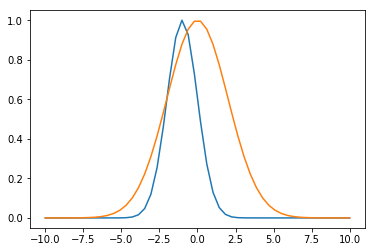

In [2]:
'''
I start off by defining a gaussian function and plot with arbitruary values to test it works
'''

def gaussian(A,t, t_0, sig):
    return A*np.exp((-(t-t_0)**2) / (2*sig**2))

t_values = np.linspace(-10, 10)
for t_0, sig in [(-1, 1), (0, 2)]:
    plt.plot(t_values, gaussian(1,t_values, t_0, sig))

plt.show()

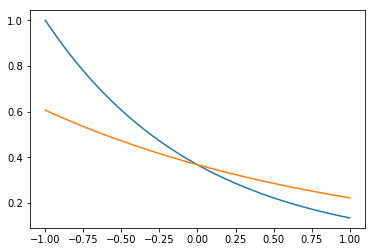

In [3]:
'''
Now do the same but for an exponential and plot with arbitruary values to test it works
'''

def exponential(amp,t,t_o,tau):
    return amp*np.exp((-(t-t_0)/tau))

t_vals = np.linspace(-1, 1)
for t_0, tau in [(-1, 1), (-2, 2)]:
    plt.plot(t_vals, exponential(1,t_vals, t_0, tau))

plt.show()

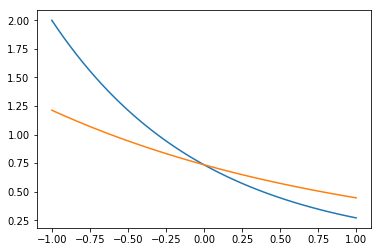

In [4]:
def double_exp(amp,t,t_o,tau):
    return amp*np.exp((-(t-t_0)/tau)) + amp*np.exp((-(t-t_0)/tau))

t_vals = np.linspace(-1, 1)
for t_0, tau in [(-1, 1), (-2, 2)]:
    plt.plot(t_vals, double_exp(1,t_vals, t_0, tau))

plt.show()

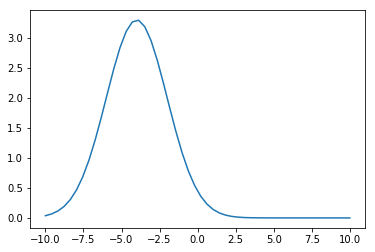

In [5]:
# Sample plot of what the continuous function (gaussian * double exponential) would look like for arbituary values
plt.plot(t_values, (gaussian(1,t_values, t_0, sig)*double_exp(1,t_values, t_0, tau)))

In [7]:
'''
Now lets combine the two functions into one continuous analytic flare model

    Parameters (same as Davenport 2014 aflare model)
    ----------
    t : 1-d array
        The time array to evaluate the flare over
    tpeak : float
        The time of the flare peak
    fwhm : float
        The "Full Width at Half Maximum", timescale of the flare
    ampl : float
        The amplitude of the flare
    Returns
    -------
    flare : 1-d array
        The flux of the flare model evaluated at each time
   
'''
# this function does not work yet
def flare_model(*args):
    flare = gaussian(*args) * double_exp(*args)
    return flare

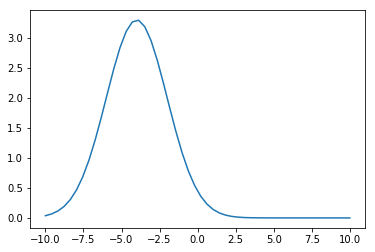

In [15]:
#plotting the continuous function again to make sure it worked
plt.plot(t_values,flare_model(1,t_values,t_0,sig))